# 🎧 Spotify Songs Analysis Project 

In this project we perform an Exploratory Data Analysis (EDA) on a dataset of 114,000 Spotify tracks sourced from Kaggle.

Key columns in this dataset include:

* popularity: A value between 0 and 100, indicating the track's popularity based on recent plays.
* duration_ms: The length of the track in milliseconds.
* explicit: Boolean indicating whether the track contains explicit content.
* danceability: Describes how suitable a track is for dancing (0.0 = least danceable, 1.0 = most danceable).
* energy: Represents the intensity and activity of a track (0.0 = low energy, 1.0 = high energy).
* loudness: Overall loudness of the track in decibels (dB).
* valence: Measures the musical positiveness conveyed by a track (0.0 = negative, 1.0 = positive).
* tempo: Estimated tempo of the track in beats per minute (BPM).

Let's dive in! 

## 📁 Importing libraries & inspecting the dataset


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('spotify.csv', index_col=0)
df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           11

We now check for missing values and dublicated rows

In [4]:
df.isnull().sum()

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [5]:
df.duplicated().sum()

450

## 🧹Cleaning the Dataset


It is important to separate the artists that share a song into multiple rows so we won't be grouping artists in collaborations as if they're a single entity.

In [6]:
df['artists'] = df['artists'].str.split(';')
df

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,[Gen Hoshino],Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,[Ben Woodward],Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,"[Ingrid Michaelson, ZAYN]",To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,[Kina Grannis],Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,[Chord Overstreet],Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,[Rainy Lullaby],#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,1hIz5L4IB9hN3WRYPOCGPw,[Rainy Lullaby],#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,6x8ZfSoqDjuNa5SVP5QjvX,[Cesária Evora],Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,2e6sXL2bYv4bSz6VTdnfLs,[Michael W. Smith],Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [7]:
df_exploded = df.explode('artists')
df_exploded

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


We continue by dropping any rows that contain missing values and removing all duplicate rows to ensure our analysis is accurate and not biased by incomplete or repeated data. We then continue by renaming some columns for our convenience.

In [8]:
df_exploded.dropna(inplace=True)
df_exploded.isnull().sum()

track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [9]:
df_exploded.drop_duplicates(inplace=True)
df_exploded.shape

(157530, 20)

In [10]:
df_exploded.rename(columns={
    'tempo': 'BPM',
    'track_genre': 'genre',
}, inplace=True)

The data is cleaned up and ready — let’s dive into the analysis!


## 📈 Which genres are the most popular on average?

We begin with exploring which genres are the most popular on average. By grouping the data by genre and calculating the mean popularity score for each, we can identify which styles tend to perform better overall on Spotify.
The chart below shows the top 10 genres with the highest average popularity. This doesn't necessarily mean they're the most frequent, but rather that songs within these genres tend to score well in terms of listener engagement.

In [11]:
avg_popularity = df_exploded.groupby('genre')['popularity'].mean().sort_values(ascending=False).head(10)
avg_popularity

genre
pop-film     59.852383
k-pop        55.020253
chill        53.183358
sad          52.076765
indian       49.839355
grunge       49.636276
pop          49.130460
emo          48.646782
anime        48.395956
sertanejo    47.819686
Name: popularity, dtype: float64

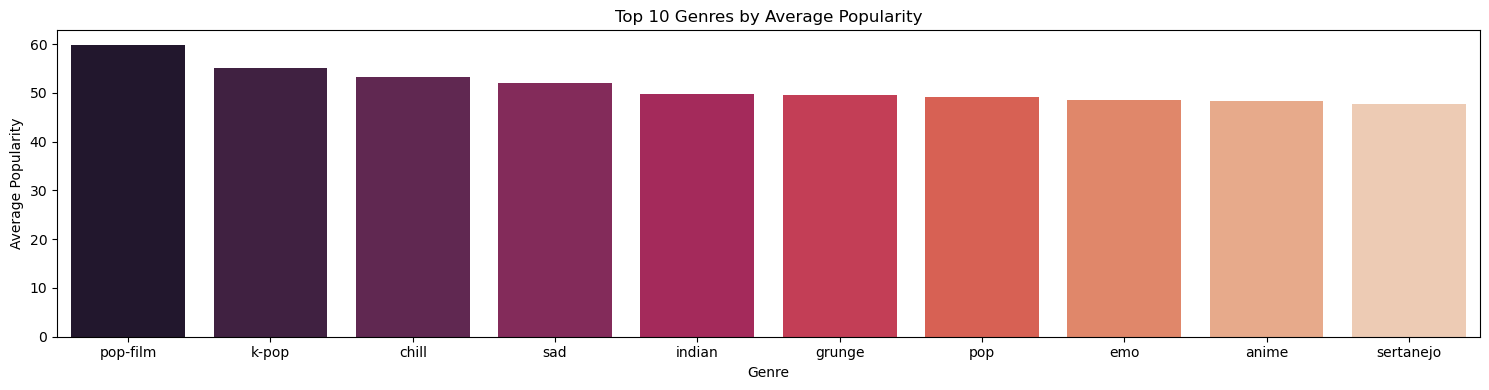

In [12]:
plt.figure(figsize=(15,4))

sns.barplot(x=avg_popularity.index, y=avg_popularity.values, palette='rocket')
plt.title('Top 10 Genres by Average Popularity')
plt.xlabel('Genre')
plt.ylabel('Average Popularity')
plt.tight_layout()

plt.show()

In contrast to the most popular genres, we also examine the genres with the lowest average popularity. These may represent, experimental sounds, or genres with smaller audiences.
The bar chart below highlights the bottom 10 genres in terms of average popularity. It's important to note that low popularity doesn't necessarily imply low quality — it may simply reflect more specialized listener bases or limited exposure on the platform.

In [13]:
least_popular = df_exploded.groupby('genre')['popularity'].mean().sort_values().head(10)
least_popular

genre
iranian            2.251994
romance            3.358102
latin              8.048119
classical         10.482368
detroit-techno    11.584174
chicago-house     12.546816
kids              14.597826
grindcore         14.630478
jazz              15.886777
idm               15.993037
Name: popularity, dtype: float64

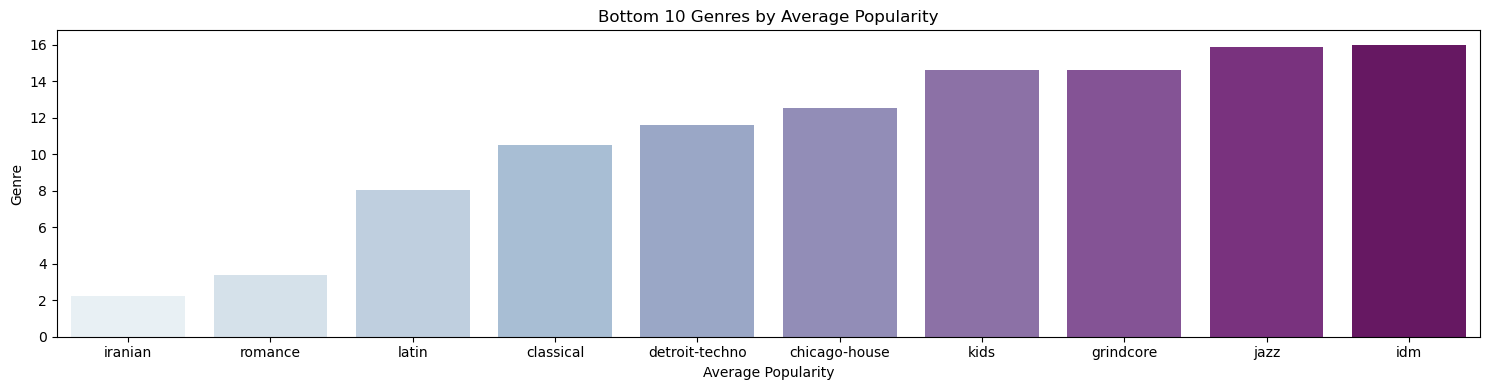

In [14]:
plt.figure(figsize=(15,4))

sns.barplot(x=least_popular.index, y=least_popular.values, palette='BuPu')
plt.title('Bottom 10 Genres by Average Popularity')
plt.xlabel('Average Popularity')
plt.ylabel('Genre')
plt.tight_layout()

plt.show()

## 🎤 Which artists tend to produce the most popular songs?

In [15]:
popular_artists = df_exploded.groupby('artists')['popularity'].mean().sort_values(ascending=False).head(10)
popular_artists

artists
Bizarrap            99.0
Quevedo             99.0
Harry Styles        92.0
Luar La L           90.5
Beach Weather       90.0
Pablo Pesadilla     88.0
Polimá Westcoast    88.0
Olivia Rodrigo      87.4
Lewis Capaldi       87.0
BYOR                87.0
Name: popularity, dtype: float64

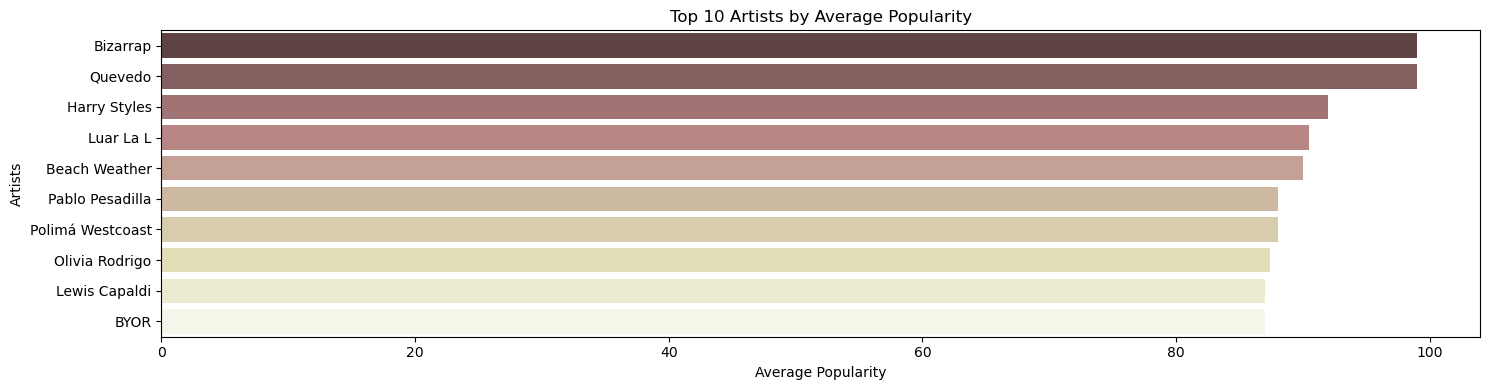

In [16]:
plt.figure(figsize=(15, 4))
sns.barplot(x=popular_artists.values, y=popular_artists.index, palette='pink')
plt.title('Top 10 Artists by Average Popularity')
plt.xlabel('Average Popularity')
plt.ylabel('Artists')
plt.tight_layout()
plt.show()

What if we wanted to find out the artists that have produced the most songs?

In [17]:
artists_count = df_exploded.groupby('artists')['track_id'].count().sort_values(ascending=False).head(10)
artists_count

artists
J Balvin                   505
Bad Bunny                  412
Daddy Yankee               367
Feid                       347
Pritam                     333
George Jones               332
Wolfgang Amadeus Mozart    305
Arijit Singh               305
ILLENIUM                   298
The Beatles                280
Name: track_id, dtype: int64

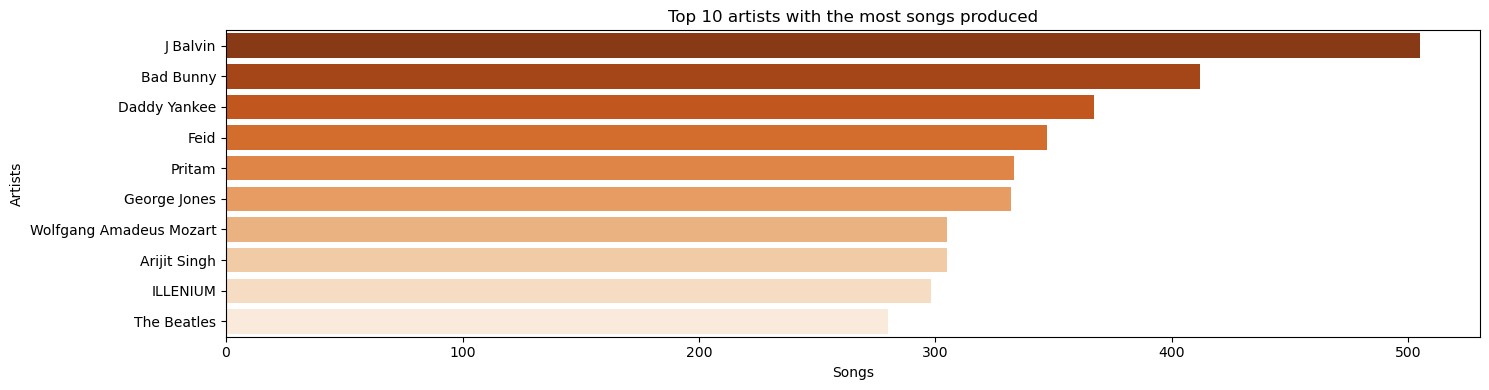

In [18]:
plt.figure(figsize=(15, 4))
sns.barplot(x=artists_count.values, y=artists_count.index, palette='Oranges_r')
plt.title('Top 10 artists with the most songs produced')
plt.xlabel('Songs')
plt.ylabel('Artists')
plt.tight_layout()
plt.show()

## 🕺 Which genres are most energetic, danceable, or happy-sounding?

In [19]:
summary_df = df_exploded.groupby('genre')[['energy', 'danceability', 'valence']].mean().sort_values('energy', ascending=False).head(10)
summary_df

,energy,danceability,valence
genre,,,
death-metal,0.931560,0.368820,0.248085
grindcore,0.923935,0.272010,0.216478
happy,0.915751,0.544441,0.316340
metalcore,0.913804,0.424913,0.317013
hardstyle,0.901440,0.540286,0.321554
party,0.876854,0.666830,0.664371
heavy-metal,0.873773,0.431422,0.389677
black-metal,0.873543,0.296550,0.191807
drum-and-bass,0.870887,0.544136,0.328346


The chart below compares genres based on their average energy, danceability, and valence (a measure of musical positivity or happiness). While. most genres tend to be energetic, genres with higher values tend to be more dance-friendly, and emotionally positive. For example, genres like party and j-dol score high across all three dimensions, while metal music appears lower, reflecting its less rhythmic nature.

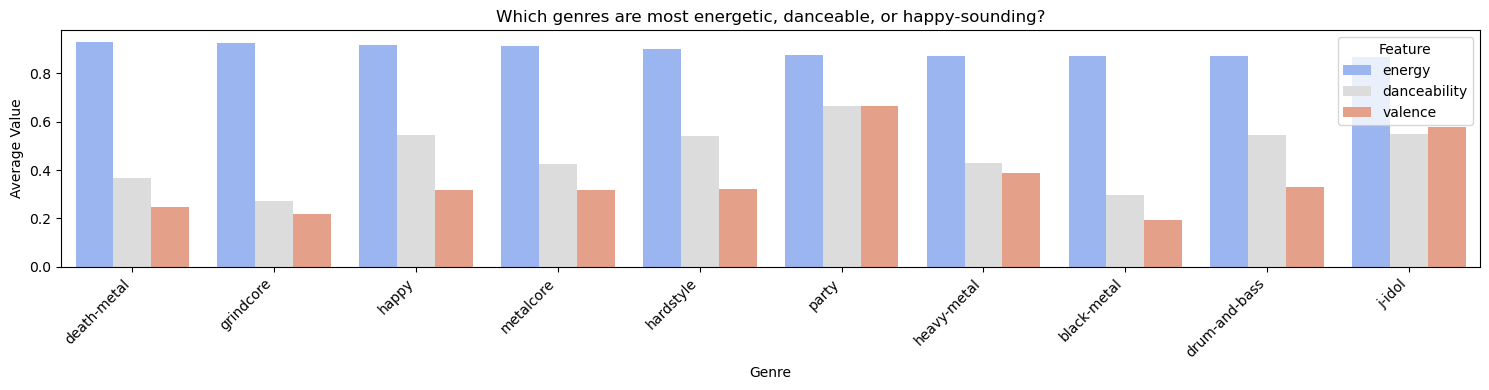

In [20]:
summary_plot_df = summary_df.reset_index().melt(id_vars='genre', 
                                                 value_vars=['energy', 'danceability', 'valence'],
                                                 var_name='Feature',
                                                 value_name='Average')
plt.figure(figsize=(15, 4))
sns.barplot(data=summary_plot_df, x='genre', y='Average', hue='Feature', palette='coolwarm')
plt.title('Which genres are most energetic, danceable, or happy-sounding?')
plt.xlabel('Genre')
plt.ylabel('Average Value')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Feature')
plt.tight_layout()
plt.show()

## ⏱ Who are the 10 artists who have released the longest & shortest songs (by duration)?

Let's start by converting miliseconds to minutes for our convienience.

In [21]:
df_exploded['duration_min'] = df_exploded['duration_ms'] / 60000
df_exploded

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,BPM,time_signature,genre,duration_min
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,...,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic,3.844433
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,...,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic,2.493500
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,...,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic,3.513767
2,1iJBSr7s7jYXzM8EGcbK5b,ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,...,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic,3.513767
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,...,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic,3.365550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,...,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music,6.416650
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,...,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music,6.416667
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,...,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music,4.524433
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,...,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music,4.731550


In [22]:
df_exploded[['artists','track_name','duration_min']].sort_values('duration_min', ascending=False).head(1)

,artists,track_name,duration_min
73617,Tale Of Us,Unity (Voyage Mix) Pt. 1,87.28825


In [23]:
df_exploded[['artists','track_name','duration_min']].sort_values('duration_min').head(1)

,artists,track_name,duration_min
59310,Leila Bela,The Exorsism Begins...,0.1431


We can see that that the longest song has a duration of 87 minutes and belongs to 'Tales of us'. Wow! If we were to dive into this, we would find out that this is a whole live show.

On the contrary, the shortest one a the duration of only 8.5 seconds belongs to Leila Bela. 

## ⏱ What’s the average song length overall and by genre?

The histogram below shows the average song length across all tracks in the dataset. Overall, the average song length is approximately 4 minutes. However the KDE shows us that there are few quite long tracks with lenghth between 20 and 90.

In [24]:
df_exploded['duration_min'].mean()

3.831751946613405

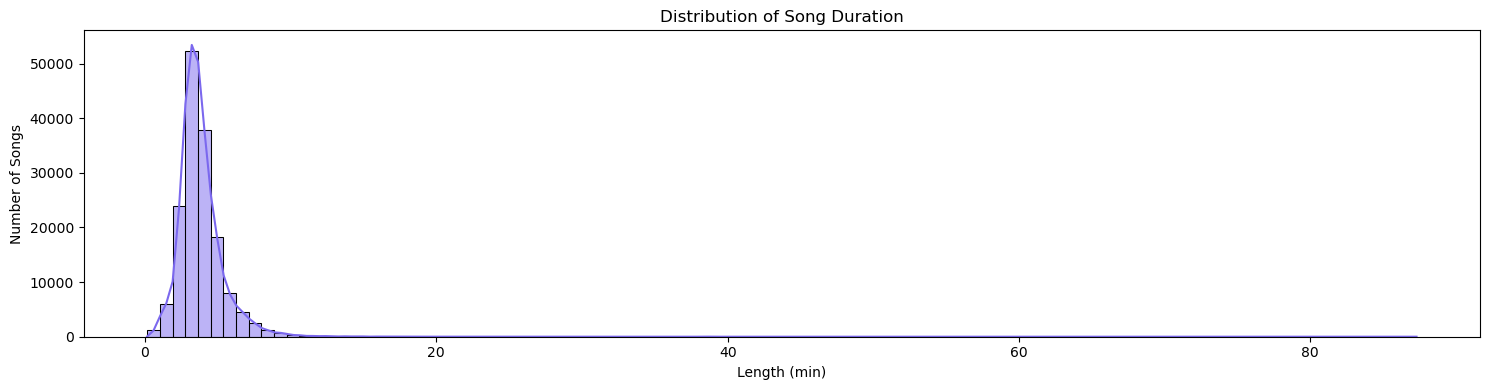

In [25]:
plt.figure(figsize=(15,4))
sns.histplot(df_exploded['duration_min'], bins=100, kde=True, color='mediumslateblue')
plt.title('Distribution of Song Duration')
plt.xlabel('Length (min)')
plt.ylabel('Number of Songs')
plt.tight_layout()
plt.show()

To understand how song duration varies by genre, we calculated the average song length within each genre. The charts below highlight the 10 genres with the longest & shortest average duration.
Genres with longer track lengths may include more instrumental or experimental music such as techno or house, while more chill and quiet genres (kids, study) tend to stick to shorter formats.

In [26]:
avg_length_long = df_exploded.groupby('genre')['duration_min'].mean().sort_values(ascending=False).head(10)
avg_length_long

genre
detroit-techno    6.298126
minimal-techno    6.122389
chicago-house     6.085321
iranian           5.436110
gospel            5.416058
black-metal       5.183963
breakbeat         5.167010
techno            5.124327
world-music       5.019925
new-age           4.926824
Name: duration_min, dtype: float64

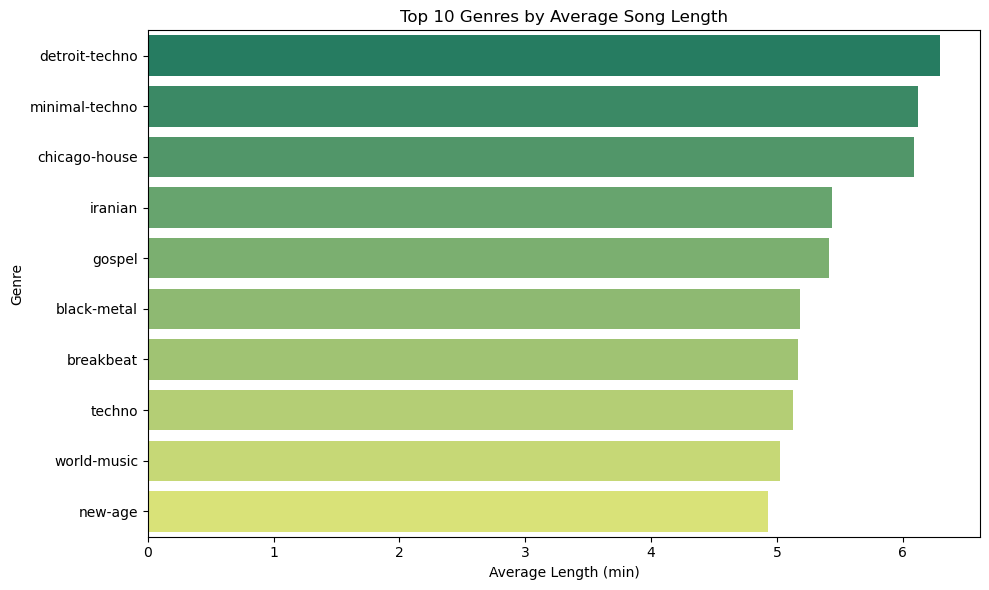

In [27]:
plt.figure(figsize=(10,6))
sns.barplot(x=avg_length_long.values, y=avg_length_long.index, palette='summer')
plt.title('Top 10 Genres by Average Song Length')
plt.xlabel('Average Length (min)')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

In [28]:
avg_length_short = df_exploded.groupby('genre')['duration_min'].mean().sort_values().head(10)
avg_length_short

genre
grindcore     2.225628
children      2.308558
study         2.357498
sad           2.566926
kids          2.601885
sleep         2.679994
honky-tonk    2.706704
disney        2.716299
chill         2.787407
rockabilly    2.876200
Name: duration_min, dtype: float64

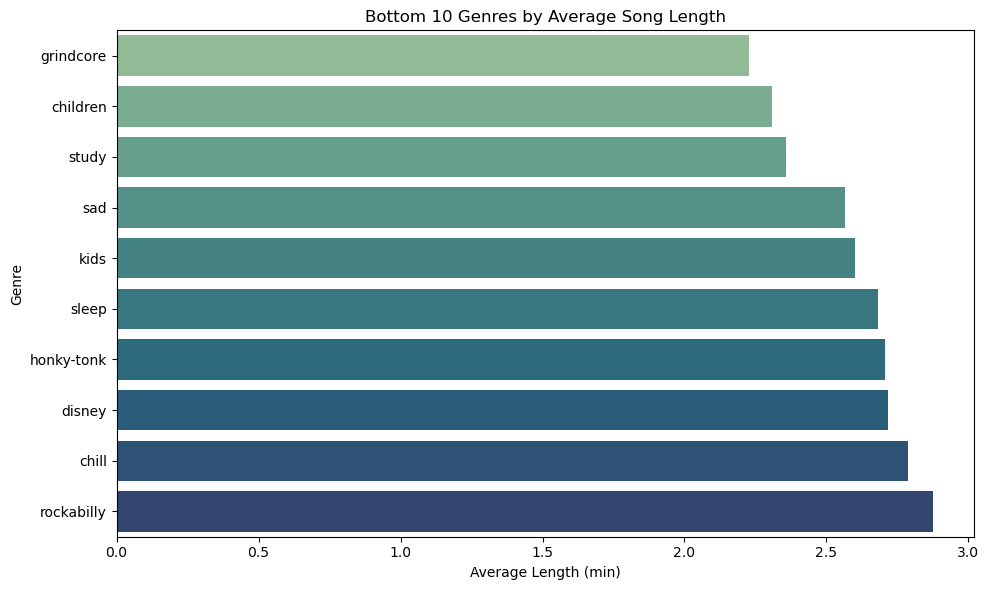

In [29]:
plt.figure(figsize=(10,6))
sns.barplot(x=avg_length_short.values, y=avg_length_short.index, palette='crest')
plt.title('Bottom 10 Genres by Average Song Length')
plt.xlabel('Average Length (min)')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

## 🔞 How many songs contain explicit content overall & by genre?

We will make a pie chart to see what percentage of all tracks have explicit content.

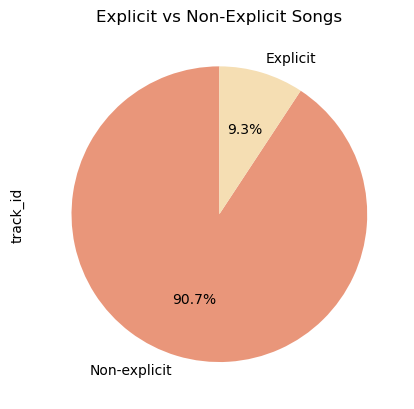

In [30]:
df_exploded.groupby(['explicit'])['track_id'].count().plot.pie(
    labels=['Non-explicit', 'Explicit'],
    autopct='%1.1f%%',
    startangle=90,
    colors=['darksalmon', 'wheat'],
    title='Explicit vs Non-Explicit Songs'
)

plt.show()

Next, we will expand our analysis to finding the percentage of explicit containt per genre.

In [49]:
genre_explicit_counts = df_exploded.groupby(['genre', 'explicit'])['track_id'].count().unstack(fill_value=0)
genre_explicit_counts.columns = ['Non-Explicit', 'Explicit'] 

genre_explicit_percent = genre_explicit_counts.div(genre_explicit_counts.sum(axis=1), axis=0) * 100
genre_explicit_percent = genre_explicit_percent.sort_values(by='Explicit', ascending=False).head(20)
genre_explicit_percent

,Non-Explicit,Explicit
genre,,
comedy,36.465116,63.534884
emo,48.508634,51.491366
sad,56.751199,43.248801
j-dance,59.499264,40.500736
hardcore,60.107610,39.892390
funk,60.233029,39.766971
dancehall,68.958991,31.041009
metalcore,69.814815,30.185185
hip-hop,70.623864,29.376136


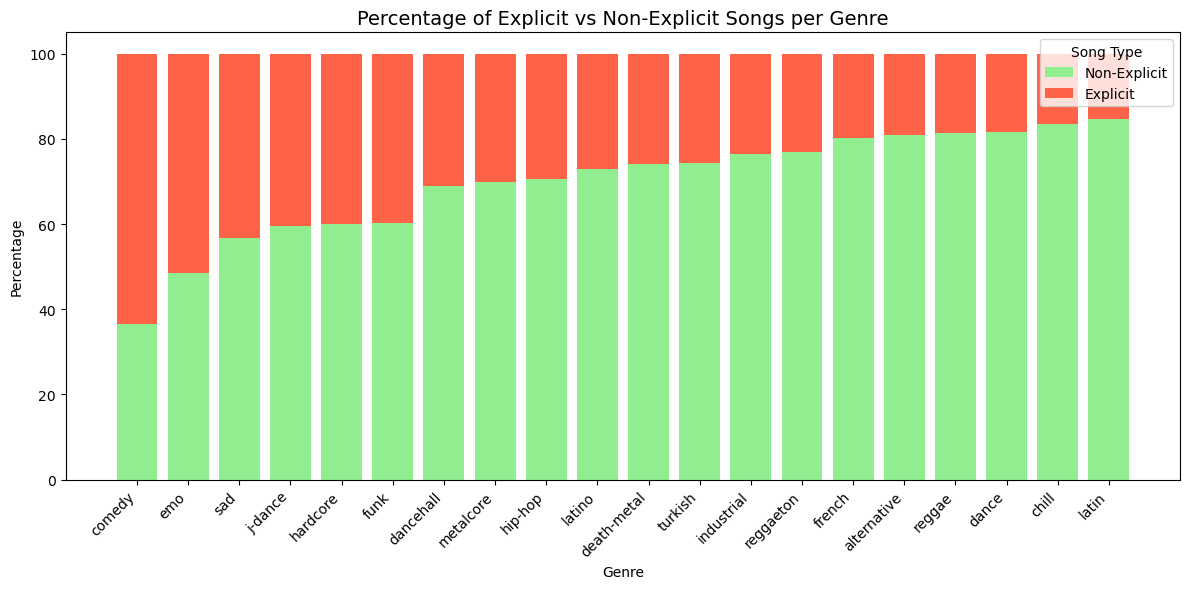

In [55]:
fig, ax = plt.subplots(figsize=(12, 6))

# Plot Non-Explicit (bottom)
ax.bar(genre_explicit_percent.index, genre_explicit_percent['Non-Explicit'],
       label='Non-Explicit', color='lightgreen')

# Plot Explicit (top)
ax.bar(genre_explicit_percent.index, genre_explicit_percent['Explicit'],
       bottom=genre_explicit_percent['Non-Explicit'], label='Explicit', color='tomato')

# Customizing
ax.set_title('Percentage of Explicit vs Non-Explicit Songs per Genre', fontsize=14)
ax.set_ylabel('Percentage')
ax.set_xlabel('Genre')
plt.xticks(rotation=45, ha='right')
ax.legend(title='Song Type')
plt.tight_layout()
plt.show()

This 100% stacked bar chart illustrates the proportion of explicit and non-explicit songs within each genre. By normalizing the values, we can compare genres regardless of how many songs they contain.
Genres are sorted by the percentage of explicit songs.

## 🔥 Do higher energy songs tend to be more loud?


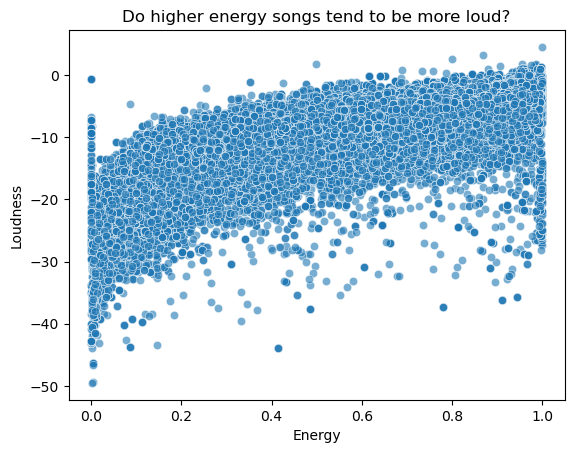

In [33]:
sns.scatterplot(data=df_exploded, x="energy", y="loudness", alpha=0.6)
plt.title("Do higher energy songs tend to be more loud?")
plt.xlabel("Energy")
plt.ylabel("Loudness")
plt.show()

In [34]:
correlation = df_exploded['energy'].corr(df_exploded['loudness'])
print(f"Correlation between energy and loudness: {correlation:.2f}")

Correlation between energy and loudness: 0.77


As we can see, energy and loudness have a strong correlation coefficient of almost 0.8. That means that indeed higher energy tracks tend to be louder.

## 🔊 Do faster songs (higher BPM) tend to be more popular?

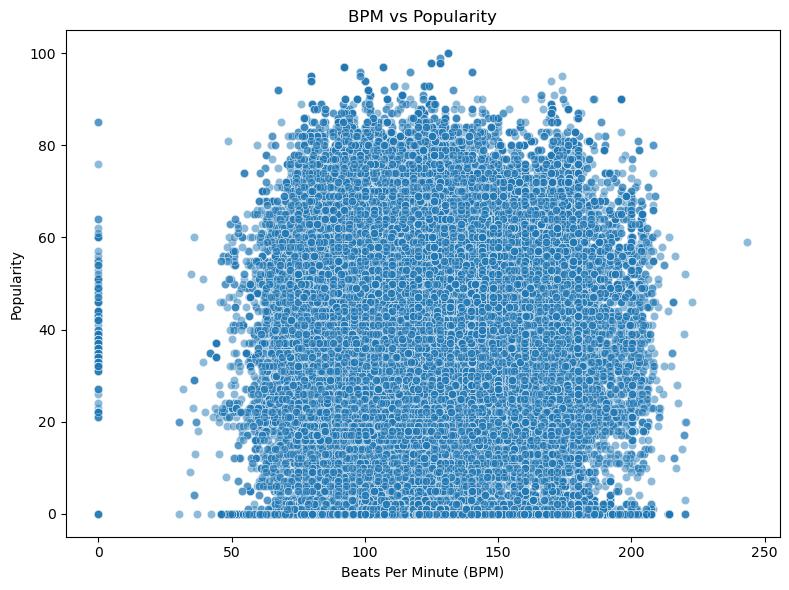

In [35]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_exploded, x='BPM', y='popularity', alpha=0.5)
plt.title('BPM vs Popularity')
plt.xlabel('Beats Per Minute (BPM)')
plt.ylabel('Popularity')
plt.tight_layout()
plt.show()

In [36]:
correlation = df_exploded['BPM'].corr(df_exploded['popularity'])
print(f"Correlation between BPM and Popularity: {correlation:.2f}")

Correlation between BPM and Popularity: 0.02


This scatterplot shows the relationship between tempo and song popularity.
The correlation coefficient is 0.02, indicating that correlation does not exist between these two metrics.

## 🎶 Which genres have the fastest & slower songs on average?

Finally, we will explore the genres with the fastest & slower tracks. As we would expect, genres like happy and punk have a fast tempo in contrast with genres like sleep or classical that tend to be slower.

In [37]:
fastest_songs = df_exploded.groupby('genre')['BPM'].mean().sort_values(ascending=False).head(10)
fastest_songs

genre
happy            154.249314
drum-and-bass    153.249230
hardstyle        147.360243
forro            140.270815
j-idol           136.073040
punk             134.205496
dubstep          134.190937
power-pop        134.095603
breakbeat        133.762890
trance           132.665139
Name: BPM, dtype: float64

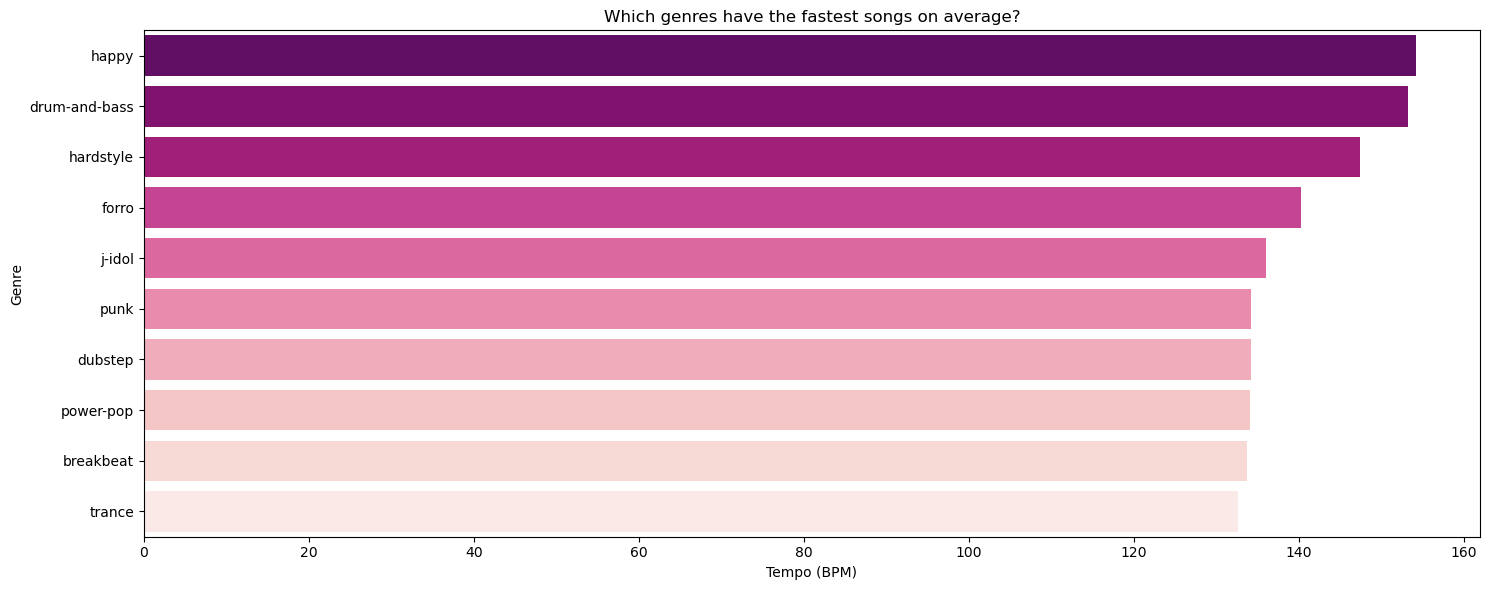

In [38]:
plt.figure(figsize=(15,6))
sns.barplot(x=fastest_songs.values, y=fastest_songs.index, palette='RdPu_r')
plt.title('Which genres have the fastest songs on average?')
plt.xlabel('Tempo (BPM)')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

In [39]:
slower_songs = df_exploded.groupby('genre')['BPM'].mean().sort_values().head(10)
slower_songs

genre
sleep         80.024330
comedy       101.502878
opera        102.778581
classical    107.521945
new-age      109.449359
romance      110.264876
study        111.574331
ambient      111.707818
dancehall    112.142355
guitar       112.297754
Name: BPM, dtype: float64

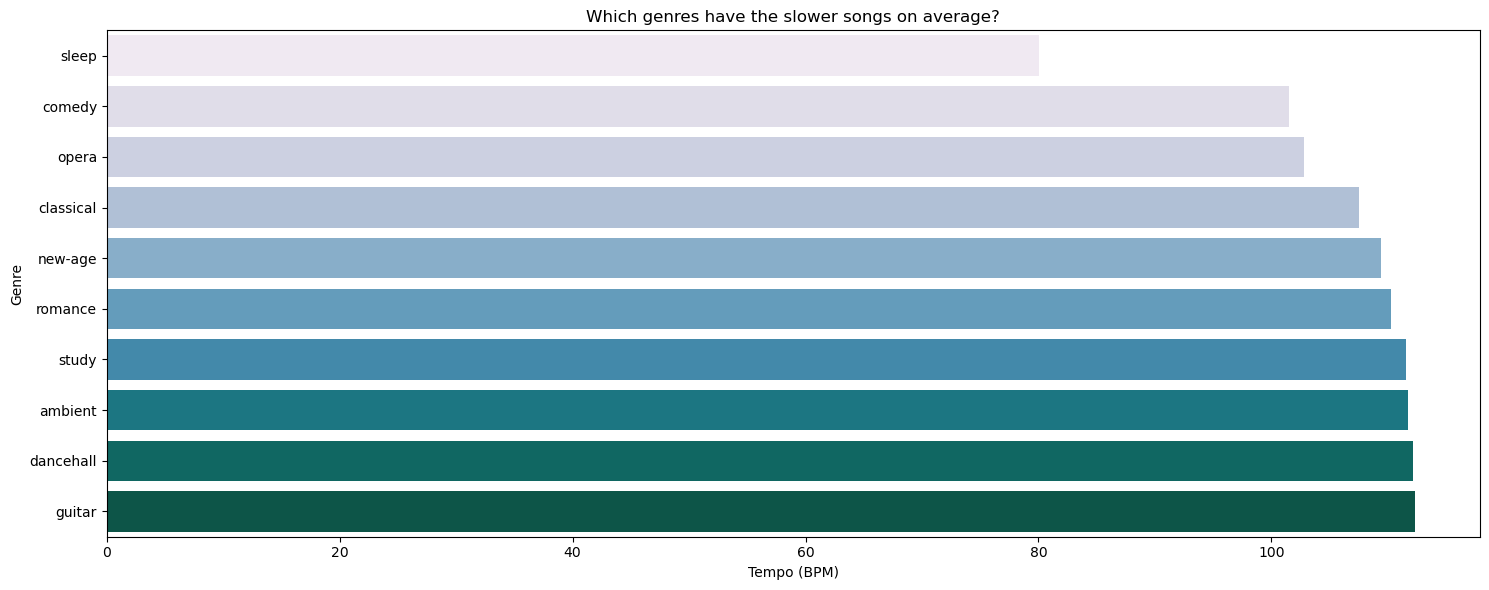

In [40]:
plt.figure(figsize=(15,6))
sns.barplot(x=slower_songs.values, y=slower_songs.index, palette='PuBuGn')
plt.title('Which genres have the slower songs on average?')
plt.xlabel('Tempo (BPM)')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()